In [10]:

import os
import glob
import altair as alt
import pandas as pd
import numpy as np
import warnings
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pathlib import Path
import os
import plotly
from tqdm import tqdm


pd.set_option('display.max_rows', 500)

In [13]:
team = "Chicago Bears"
team_city = "Chicago"
team_underscore = "_".join(team.lower().split(" "))

team_opp = "Green Bay Packers"
team_opp_alt = team_opp
team_city_opp = "Green Bay"
team_opp_underscore = "_".join(team_opp.lower().split(" "))

team_date = "20221129"
player_date = "20221129"
nfl_date = "20221129"
# bears
# background etc.
primary_color = "#0B162A" 
secondary_color = "#C83803"

opp_primary_color = "#203731" 
opp_secondary_color = "#FFB612"

path_base = Path(os.getcwd()).parents[1]

print(path_base)

/notebooks/chicago_bears_nerd


In [14]:
cols = ["Date", "Opponent", "Result", "W/L", "Div", "Spread", "Total", "Money"]
df_schedule = pd.read_csv(f"{path_base}/data/team_ranks/_nfl_team_{team_underscore}__{team_date}.csv")
df_schedule["Opponent"] = np.where(df_schedule.Location.eq("Away"), "@" + df_schedule.Opponent, df_schedule.Opponent)
record_str = df_schedule[~df_schedule.Div.isnull()].iloc[-1]["W/L"]

In [16]:
df_schedule = df_schedule.fillna("")
df_schedule = df_schedule.head(n=15)[cols]

df_schedule_opp = pd.read_csv(f"{path_base}/data/team_ranks/_nfl_team_{team_opp_underscore}__{team_date}.csv")
df_schedule_opp["Opponent"] = np.where(df_schedule_opp.Location.eq("Away"), "@" + df_schedule_opp.Opponent, df_schedule_opp.Opponent)
record_opp_str = df_schedule_opp[~df_schedule_opp.Div.isnull()].iloc[-1]["W/L"]

df_schedule_opp = df_schedule_opp.fillna("")
df_schedule_opp = df_schedule_opp.head(n=15)[cols]

In [17]:
file_path = f"{path_base}/data/team_ranks/_nfl_player_stat_*{team_date}.csv"
file_paths = glob.glob(os.path.join(file_path))

pds = list()
pbar = tqdm(file_paths)
for file_path in pbar:
    pbar.set_description(file_path)
    df = pd.read_csv(file_path)
    pds.append(df)
_df_player = pd.concat(pds)

/notebooks/chicago_bears_nerd/data/team_ranks/_nfl_player_stat_scoring_total_points_20221129.csv: 100%|██████████| 111/111 [00:00<00:00, 281.65it/s]                  


In [18]:
_df_player.Team.unique()

array(['Washington Commanders', 'Atlanta Falcons', 'Indianapolis Colts',
       'New Orleans Saints', 'Green Bay Packers', 'Arizona Cardinals',
       'Chicago Bears', 'Carolina Panthers', 'Pittsburgh Steelers',
       'New York Giants', 'Cincinnati Bengals', 'Baltimore Ravens',
       'Seattle Seahawks', 'New York Jets', 'Philadelphia Eagles',
       'Tampa Bay Buccaneers', 'Los Angeles Rams', 'Cleveland Browns',
       'Jacksonville Jaguars', 'Tennessee Titans', 'Los Angeles Chargers',
       'Buffalo Bills', 'Miami Dolphins', 'Detroit Lions',
       'Dallas Cowboys', 'Minnesota Vikings', 'Houston Texans',
       'Kansas City Chiefs', 'San Francisco 49ers',
       'New England Patriots', 'Las Vegas Raiders', 'Denver Broncos'],
      dtype=object)

In [19]:
cols = ["Player", "Pos", "Rank", "Stat", "Value"]

player_stats_list = ["passing-gross-yards", "passing-touchdowns", "rushing-net-yards", "rushing-touchdowns", "defense-total-tackles", "defense-sacks"]
_df_player["_stat"] = _df_player.url.str.split("/", expand=True)[3]
_df_player["Stat"] = _df_player._stat.str.split("-").str.join(" ").str.title()
_df_player = _df_player[_df_player._stat.isin(player_stats_list)]
_df_player["Stat"] = _df_player.Stat.str.replace("Per Game", "Pg").str.replace("Opponent", "Opp")\
.str.replace("Offensive", "Off")\
.str.replace("Defensive", "Def")\
.str.replace("Touchdowns", "Td")\
.str.replace("Rushing", "Run")\
.str.replace("Passing", "Pass")\
.str.replace("Total", "")\
.str.replace("Defense", "")\
.str.replace("Gross", "")\
.str.replace("Net", "")
_df_player["Value"] = pd.to_numeric(_df_player.Value)
_df_player = _df_player[_df_player.Value.gt(0)]

df_player = _df_player[_df_player.Team.eq(team)][cols]
df_player_opp = _df_player[_df_player.Team.eq(team_opp)][cols]

In [20]:
file_path = f"{path_base}/data/team_ranks/_nfl_stat*{nfl_date}.csv"
file_paths = glob.glob(os.path.join(file_path))
pds = list()
pbar = tqdm(file_paths)
for file_path in pbar:
    pbar.set_description(file_path)
    df = pd.read_csv(file_path)
    pds.append(df)
df = pd.concat(pds)

/notebooks/chicago_bears_nerd/data/team_ranks/_nfl_stat_opponent_penalties_per_play_20221129.csv: 100%|██████████| 226/226 [00:00<00:00, 262.69it/s]                     


In [21]:
def_stats = {
    "opponent-points-per-game":.6,
    "opponent-points-per-play":1,
    "opponent-1st-half-points-per-game":1.5,
    "opponent-2nd-half-points-per-game":1.6,
    "opponent-rushing-touchdowns-per-game":1.7,
    "opponent-passing-touchdowns-per-game":1.8,
    "opponent-yards-per-game":1.85,
    "opponent-yards-per-play":1.9,
    "opponent-rushing-yards-per-game":2,
    "opponent-yards-per-rush-attempt":2.1,
    "opponent-passing-yards-per-game":2.6,
    "opponent-yards-per-pass-attempt":3,
    "defensive-points-per-game":4,
    "sacks-per-game":10,
    "interceptions-per-game":11,
    "opponent-fumbles-per-game":12,
    "opponent-red-zone-scores-per-game":13,
    "opponent-red-zone-scoring-pct":14,
    "opponent-seconds-per-play":15,
    "takeaways-per-game":16,
    "opponent-third-down-conversion-pct":17,
    }


stats = {
    "points-per-game":2,
    "points-per-play":3.5,
    "1st-half-points-per-game":3.9,
    "2nd-half-points-per-game":4,
    "rushing-touchdowns-per-game":4.1,
    "passing-touchdowns-per-game":4.2,
    "yards-per-game":4.5,
    "yards-per-play":4.8,
    "rushing-yards-per-game":4.9,
    "yards-per-rush-attempt":5,
    "rushing-play-pct":5.5,
    "passing-yards-per-game":5.6,
    "yards-per-pass-attempt":6,
    "passing-play-pct":7,
    "qb-sacked-per-game":10,
    "interceptions-thrown-per-game":11,
    "fumble-per-game":12,
    "penalties-per-game":13,
    "red-zone-scores-per-game":14,
    "red-zone-scoring-pct":15,
    "seconds-per-play":16,
    "giveaways-per-game":17,
    "third-down-conversion-pct":18,
    }

df["_stat"] = df.url.str.split("/", expand=True)[3]
df["Stat"] = df._stat.str.split("-").str.join(" ").str.title()
df["Stat"] = df.Stat.str.replace("Per Game", "Pg").str.replace("Opponent", "Opp")\
.str.replace("Offensive", "Off")\
.str.replace("Defensive", "Def")\
.str.replace("Touchdowns", "Td")\
.str.replace("Rushing", "Run")\
.str.replace("Passing", "Pass")\
.str.replace("Interceptions", "Int")

In [22]:
df.Team.unique()

array(['Philadelphia', 'Buffalo', 'Miami', 'LA Chargers', 'Kansas City',
       'Cincinnati', 'Seattle', 'Detroit', 'Tennessee', 'Las Vegas',
       'San Francisco', 'Baltimore', 'Dallas', 'Minnesota', 'Cleveland',
       'Atlanta', 'Chicago', 'Pittsburgh', 'Green Bay', 'Jacksonville',
       'New England', 'Arizona', 'NY Jets', 'LA Rams', 'New Orleans',
       'Denver', 'Washington', 'Tampa Bay', 'NY Giants', 'Carolina',
       'Houston', 'Indianapolis'], dtype=object)

In [23]:
def generate_off_def_df(dft, gstats=stats):
    dft["_order"] = dft._stat.map(gstats)
    dfp = dft[dft._stat.isin(gstats)]
    dfp_opp = dfp[dfp.Team.eq(team_city_opp)].sort_values("_order")
    dfp = dfp[dfp.Team.eq(team_city)].sort_values("_order")
    return dfp, dfp_opp

def generate_spider(df, primarycolor, plot_name, custom_data_columns=["2021", "2022"], visible=True):
    return go.Scatterpolar(
    r=df.Rank.tolist(),
    theta=df.Stat.tolist(),
    visible=visible,
    fill='toself',
    customdata=df[custom_data_columns],
    hovertemplate = "Stat: %{theta} <br> Rank: %{r} <br> 2022: %{customdata[0]} <br> 2021: %{customdata[1]} <extra></extra>",
    hoverlabel=dict(bgcolor=primarycolor, font_size=16, font_color="#A5ACAF"),
    name=plot_name,
    marker=dict(color=primarycolor, size=10,line=dict(width=2))
)

def generate_table(df, header_color, background_color, sel_cols=["Stat", "Rank", "2022", "2021"], columnwidth=[.40, .2, .2, .2], visible=True):
    if sel_cols is not None:
        df = df[sel_cols]
    return go.Table(
        header=dict(values=df.columns, fill_color=header_color, font_color="white"), 
        columnwidth=columnwidth, visible=visible,
        cells=dict(values=df.T.values, fill_color=background_color, font_color="white", height=35, align=["left", "center"])
    )


In [24]:
df_plot_opp

NameError: name 'df_plot_opp' is not defined

In [26]:
df_plot

Unnamed: 0  Rank     Team    2022  Last 3  Last 1    Home    Away    2021  \
18          18    19  Chicago    20.9    21.3      10    22.2      20    18.3   
16          16    17  Chicago   0.346   0.356   0.179   0.352   0.341   0.289   
16          16    17  Chicago    10.8    12.3      10       8    12.9     9.6   
20          20    21  Chicago    10.1       9       0    14.2     7.1     8.6   
5            5     6  Chicago     1.2     1.3       0     1.2     1.1     0.8   
21          21    21  Chicago     1.2     1.3       1     1.6     0.9     0.9   
23          23    24  Chicago   323.2   329.3     292   346.8   306.3   307.4   
17          17    18  Chicago     5.3     5.5     5.2     5.5     5.2     4.9   
0            0     1  Chicago     192   181.7     127   225.4   168.1   118.7   
0            0     1  Chicago     5.4     5.2     4.4       6     4.9     4.2   
0            0     1  Chicago  59.23%  58.33%  51.79%  60.00%  58.64%  44.19%   
31          31    32  Chicago   131.2   147.7     165   121.4   138.1   188.6   
12          12    13  Chicago     7.2     7.6     7.2     6.5     7.7     6.7   
31          31    32  Chicago  40.77%  41.67%  48.21%  40.00%  41.36%  55.81%   
30          30    31  Chicago     3.5       3       2     3.4     3.6     3.4   
18          18    19  Chicago     0.8       1       1       1     0.6     1.2   
6            6     7  Chicago     5.2     5.7       1     5.2     5.1     6.2   
13          13    13  Chicago     1.8       2       1     1.8     1.9     1.4   
12          12    13  Chicago  57.89%  66.67%  33.33%  60.00%  56.52%  47.92%   
25          25    26  Chicago    30.2    30.8    29.9    29.3    30.8    28.8   
16          16    17  Chicago     1.3       1       1     1.2     1.3     1.7   
6            6     7  Chicago  44.44%  47.50%  30.77%  47.06%  42.55%  34.72%   

          asof                                      url  \
18  2022-11-29                /nfl/stat/points-per-game   
16  2022-11-29                /nfl/stat/points-per-play   
16  2022-11-29       /nfl/stat/1st-half-points-per-game   
20  2022-11-29       /nfl/stat/2nd-half-points-per-game   
5   2022-11-29    /nfl/stat/rushing-touchdowns-per-game   
21  2022-11-29    /nfl/stat/passing-touchdowns-per-game   
23  2022-11-29                 /nfl/stat/yards-per-game   
17  2022-11-29                 /nfl/stat/yards-per-play   
0   2022-11-29         /nfl/stat/rushing-yards-per-game   
0   2022-11-29         /nfl/stat/yards-per-rush-attempt   
0   2022-11-29               /nfl/stat/rushing-play-pct   
31  2022-11-29         /nfl/stat/passing-yards-per-game   
12  2022-11-29         /nfl/stat/yards-per-pass-attempt   
31  2022-11-29               /nfl/stat/passing-play-pct   
30  2022-11-29             /nfl/stat/qb-sacked-per-game   
18  2022-11-29  /nfl/stat/interceptions-thrown-per-game   
6   2022-11-29             /nfl/stat/penalties-per-game   
13  2022-11-29       /nfl/stat/red-zone-scores-per-game   
12  2022-11-29           /nfl/stat/red-zone-scoring-pct   
25  2022-11-29               /nfl/stat/seconds-per-play   
16  2022-11-29             /nfl/stat/giveaways-per-game   
6   2022-11-29      /nfl/stat/third-down-conversion-pct   

                            _stat                       Stat  _order  
18                points-per-game                  Points Pg     2.0  
16                points-per-play            Points Per Play     3.5  
16       1st-half-points-per-game         1St Half Points Pg     3.9  
20       2nd-half-points-per-game         2Nd Half Points Pg     4.0  
5     rushing-touchdowns-per-game                  Run Td Pg     4.1  
21    passing-touchdowns-per-game                 Pass Td Pg     4.2  
23                 yards-per-game                   Yards Pg     4.5  
17                 yards-per-play             Yards Per Play     4.8  
0          rushing-yards-per-game               Run Yards Pg     4.9  
0          yards-per-rush-attempt     Yards Per Rush Attempt     5.0  
0

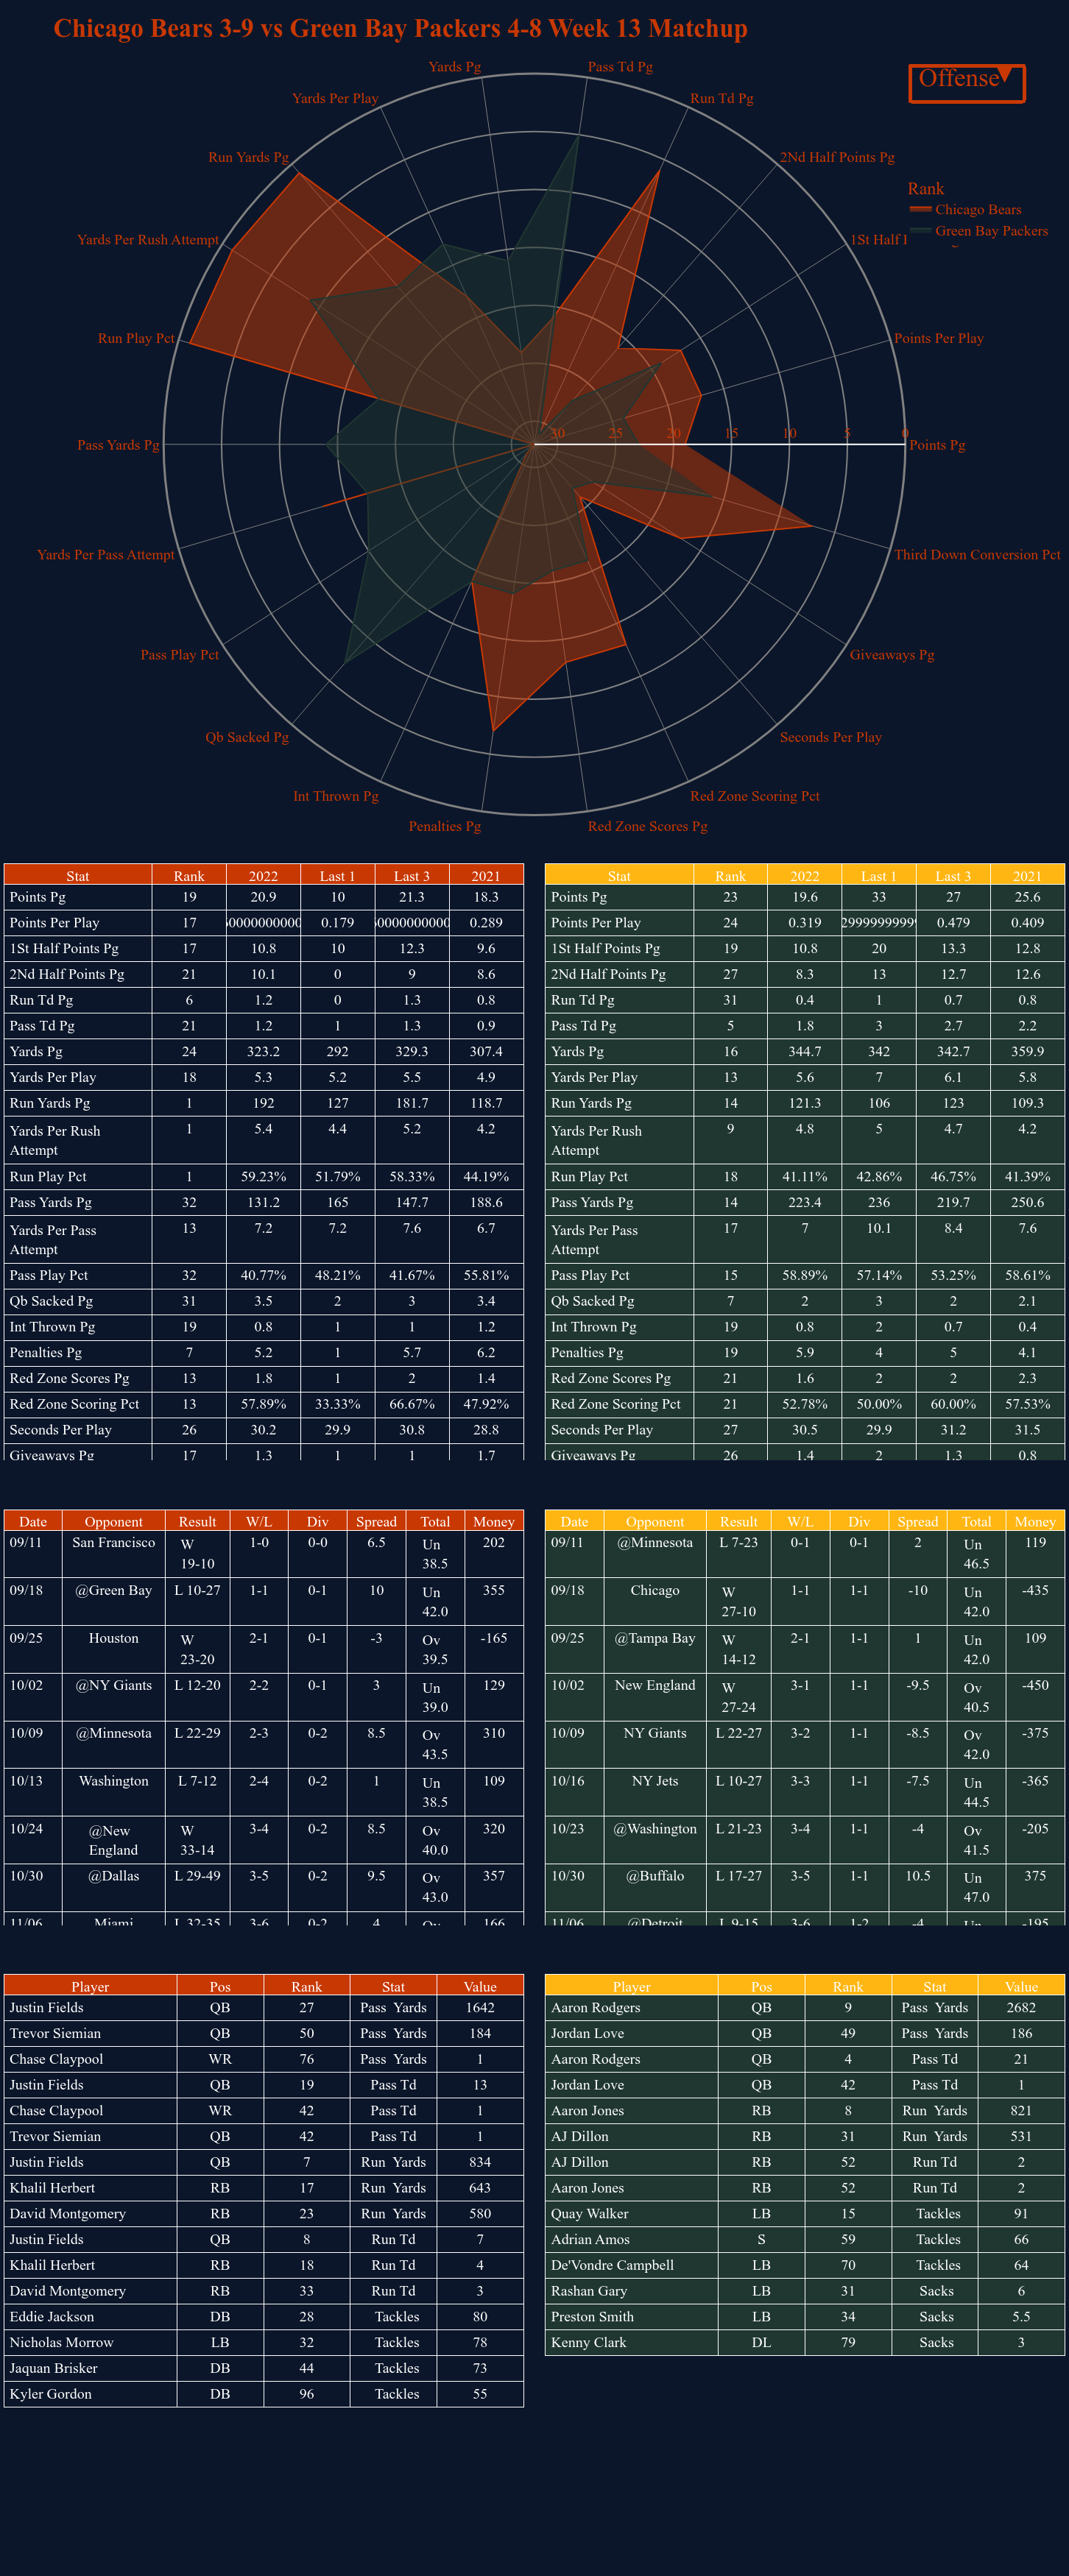

In [25]:
df_plot_def, df_plot_opp_def = generate_off_def_df(df, def_stats)
df_plot, df_plot_opp = generate_off_def_df(df, stats)
week = df_schedule[df_schedule.Opponent.str.contains(team_city_opp)].index.max()+1



fig = make_subplots(rows=4, cols=2, 
                    row_heights=[.41, .33, .23, .30], 
                    horizontal_spacing=.02, 
                    vertical_spacing=.02,
                    specs=[
                        [{"colspan": 2, "type":"scatterpolar"}, None],
                        [{"type":"table"}, {"type":"table"}],
                        [{"type":"table"}, {"type":"table"}],
                        [{"type":"table"}, {"type":"table"}],
                    ]
                   )

opp_color = opp_primary_color
sel_cols = ["Stat", "Rank", "2022", "Last 1", "Last 3", "2021"]

scat = generate_spider(df_plot, primarycolor=secondary_color, plot_name=team)
scat_opp = generate_spider(df_plot_opp, primarycolor=opp_primary_color, plot_name=team_opp)
scat_def = generate_spider(df_plot_def, primarycolor=secondary_color, plot_name=team, visible=False)
scat_opp_def = generate_spider(df_plot_opp_def, primarycolor=opp_primary_color, plot_name=team_opp, visible=False)

table = generate_table(df_plot, header_color=secondary_color, background_color=primary_color, sel_cols=sel_cols)
table_opp = generate_table(df_plot_opp,  header_color=opp_secondary_color, background_color=opp_primary_color, sel_cols=sel_cols)

table_def = generate_table(df_plot_def,  header_color=secondary_color, background_color=primary_color, visible=False, sel_cols=sel_cols)
table_opp_def = generate_table(df_plot_opp_def,  header_color=opp_secondary_color, background_color=opp_primary_color, visible=False, sel_cols=sel_cols)

table_schedule = generate_table(df_schedule, header_color=secondary_color, background_color=primary_color, columnwidth=[.2, .35, .22, .2], sel_cols=None)
table_player = generate_table(df_player, header_color=secondary_color, background_color=primary_color, columnwidth=[.4, .2, .2, .2], sel_cols=None)

table_opp_schedule = generate_table(df_schedule_opp,  header_color=opp_secondary_color, background_color=opp_primary_color, columnwidth=[.2, .35, .22, .2], sel_cols=None)
table_opp_player = generate_table(df_player_opp,  header_color=opp_secondary_color, background_color=opp_primary_color, columnwidth=[.4, .2, .2, .2], sel_cols=None)



fig.add_trace(scat)
fig.add_trace(scat_opp)

fig.add_trace(scat_def)
fig.add_trace(scat_opp_def)

fig.add_trace(table, row=2, col=1)
fig.add_trace(table_opp, row=2, col=2)

fig.add_trace(table_def, row=2, col=1)
fig.add_trace(table_opp_def, row=2, col=2)


fig.add_trace(table_schedule, row=3, col=1)
fig.add_trace(table_player, row=4, col=1)

fig.add_trace(table_opp_schedule, row=3, col=2)
fig.add_trace(table_opp_player, row=4, col=2)


updatemenus = [{'buttons': [{'method': 'update',
  'label': 'Offense',
  'visible': True,
  'args': [{'visible': [True, True, False, False, True, True, False, False, True, True, True, True]}
          ]},
 {'method': 'update',
  'label': 'Defense',
  'visible': True,
  'args': [{'visible': [False, False, True, True, False, False, True, True, True, True, True, True], "execute":False}
          ]}
],
                'active':0,
                'direction': 'down',
                'showactive': False,
                "pad":{"r": 5, "t": 20},
                "xanchor":"left",
                "yanchor":"bottom",
                "x":.85,
                "y":.99,
                "font_size":35,
                "bgcolor":primary_color,
                "bordercolor":secondary_color,
                "borderwidth":5,
               }
]


fig.update_layout(
    title= f"<b>{team} {record_str} vs {team_opp} {record_opp_str} Week {week} Matchup </b>",
    font_family="Times New Roman",
    updatemenus=updatemenus,
    height=3500,
    margin=dict(
        l=5,
        r=5,
    ),
    showlegend=True,
    title_font_size=35,
    legend_title="Rank",
    font_size = 20,
    legend=dict(yanchor="top",y=0.96,xanchor="left", x=0.85),

    font=dict(color=secondary_color),
    polar = dict(
      bgcolor = primary_color,
      angularaxis = dict(linewidth = 3, showline=True, gridcolor = "grey", linecolor="grey"),
      radialaxis = dict(side = "counterclockwise", showline = True, linewidth = 2, gridcolor = "grey", gridwidth = 2, dtick=5, autorange="reversed"),        
    ),
    paper_bgcolor = primary_color
)

# dont think this works correctly
#fig.to_json("chart_foo.json")

plotly.io.write_json(fig, "chart_json/spider.json")
fig.show()